References

My Statistics learning notebook following the live lesson series [**"Probability and Statistics for Machine Learning"**](https://learning.oreilly.com/videos/probability-and-statistics/9780137566273/) by Dr. Jon Krohn. I adapted some and partially modified or added entirely new code. Notes largely based on and from Jon's notebooks and learning materials. The lesson and original notebook source code at:

https://learning.oreilly.com/videos/probability-and-statistics/9780137566273/
https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb

## Basic Setup

In [ ]:
import math
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('here')

# shows the image immediately. Resize option available
def show_img(path, resize=None):
  img = cv2.imread(path)
  if (resize != None):
    img = cv2.resize(img, dsize=(0,0), fx=resize, fy=resize)
  cv2_imshow(img)

# turns the path into an image object. Resize option available
def get_img(path, resize=None):
  img = cv2.imread(path)
  if (resize != None):
    img = cv2.resize(img, dsize=(0,0), fx=resize, fy=resize)
  return img

def cite_source(img, source, org=None, scale=None):
    if (org == None):
        img = cv2.putText(img, source, org=(int(np.ceil(img.shape[1]*0.1)), int(np.ceil(img.shape[0]*0.98))),
                          fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=scale, color=1)
    elif (org != None):
        img = cv2.putText(img, source, org=org,
                          fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=scale, color=1)
    return img

# Code by Bill Grates on Stackoverflow
# https://stackoverflow.com/users/5629538/bill-grates
# https://stackoverflow.com/questions/32609098/how-to-fast-change-image-brightness-with-python-opencv

def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

Mounted at here


# 3.1 The Mean, a Measure of Central Tendency
Sum up all the frequencies below and divide it by the number of frequency count attemps. 

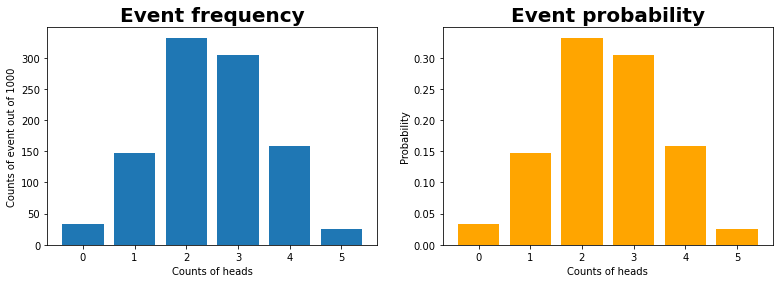

In [ ]:
n_experiments = 1000
heads_count = np.random.binomial(5, 0.5, n_experiments)

heads, event_count = np.unique(heads_count, return_counts=True)
heads, event_count

fig, ax = plt.subplots(1, 2, figsize=(13, 4))
ax[0].bar(heads, event_count, label='')
ax[0].set_xlabel('Counts of heads')
ax[0].set_ylabel('Counts of event out of 1000')
ax[0].set_title("Event frequency", fontsize=20, fontweight='bold')
ax[1].bar(heads, event_count/n_experiments, color='orange')
ax[1].set_xlabel('Counts of heads')
ax[1].set_ylabel('Probability')
ax[1].set_title("Event probability", fontsize=20, fontweight='bold')
plt.show()

In [ ]:
sum(heads_count) / len(heads_count)

2.48

# 3.2 Medians

In [ ]:
heads_count = np.random.binomial(5, 0.5, n_experiments)
heads_count[:20]

array([2, 2, 1, 0, 2, 2, 1, 3, 3, 3, 2, 3, 0, 3, 3, 1, 3, 3, 2, 1])

In [ ]:
# heads_count.sort()
heads_count[:50]

array([2, 2, 1, 0, 2, 2, 1, 3, 3, 3, 2, 3, 0, 3, 3, 1, 3, 3, 2, 1, 2, 1,
       4, 1, 2, 2, 4, 2, 3, 3, 3, 4, 3, 2, 3, 3, 1, 1, 4, 2, 1, 1, 2, 3,
       0, 3, 3, 2, 2, 4])

In [ ]:
heads_count[-20:]

array([2, 2, 3, 2, 0, 3, 3, 3, 4, 4, 4, 3, 1, 2, 2, 2, 5, 1, 2, 4])

In [ ]:
values, counts = np.unique(heads_count, return_counts=True)
median = (values[2] + values[3]) / 2
median

2.5

# 3.3 Modes
- With small sample sizes, the mean typically provides the most accurate measure of central tendency.

- With larger sample sizes, the mean, median, and mode will tend to coincide, as long as the distribution isn't skewed:

In [ ]:
import scipy.stats as st
st.mode(heads_count)

ModeResult(mode=array([3]), count=array([329]))

In [ ]:
x = st.skewnorm.rvs(0, size=1000)   # first argument is 'skewness'; 0 has no skew.

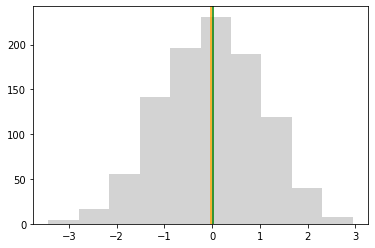

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')
# Note: Mode typically only applies to PMFs; this is a PDF

Mod is least affected by the skewness.

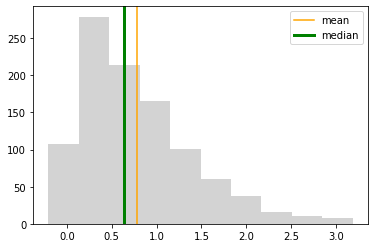

In [ ]:
x = st.skewnorm.rvs(10, size=1000)
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange', label='mean')
plt.axvline(x = np.median(x), color='green', label='median', linewidth=3)
plt.legend()
_ = plt.hist(x, color = 'lightgray')

# 3.4 Quantiles: Percentiles, Quartiles, and Deciles
## Percentiles
- out of 100

In [ ]:
median, quantile = np.median(x), np.quantile(x, 0.5)
median, quantile

(0.6398401159770304, 0.6398401159770304)

In [ ]:
median == quantile

True

In [ ]:
p = np.percentile(x, [95, 99])
p                  

array([1.989051  , 2.68726693])

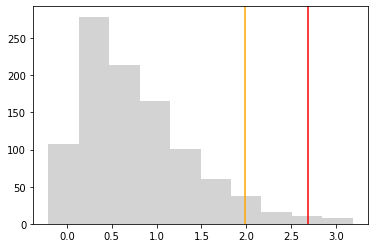

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = p[0], color='orange')
plt.axvline(x = p[1], color='red')
_ = plt.hist(x, color='lightgray')

## Quartiles
- into 1/4 chunks

In [ ]:
q = np.percentile(x, [25, 50, 75])
q

array([0.30656123, 0.63984012, 1.11608081])

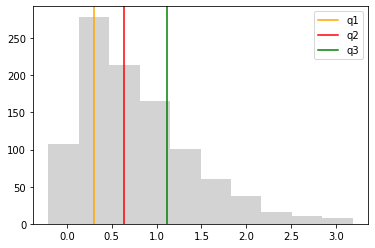

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = q[0], color='orange', label='q1')
plt.axvline(x = q[1], color='red', label='q2')
plt.axvline(x = q[2], color='green', label='q3')
_ = plt.hist(x, color='lightgray')
plt.legend()

## Deciles
  - from decimus (meaning 10th)
  - 'decimate': to kill, destroy, or remove a large percentage or part of.
    - the verb comes from the idea that 1/10 are dead when massacre/destruction happens.

In [ ]:
index = [i for i in range(10, 100, 10)]
index

[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [ ]:
d = np.percentile(x, range(10, 100, 10))
d

array([0.12753788, 0.24115174, 0.36881371, 0.4937205 , 0.63984012,
       0.80888847, 1.02703157, 1.2283464 , 1.65358848])

(array([108., 279., 214., 166., 101.,  60.,  38.,  16.,  10.,   8.]),
 array([-0.20504574,  0.13421275,  0.47347125,  0.81272974,  1.15198823,
         1.49124672,  1.83050521,  2.16976371,  2.5090222 ,  2.84828069,
         3.18753918]),
 <a list of 10 Patch objects>)

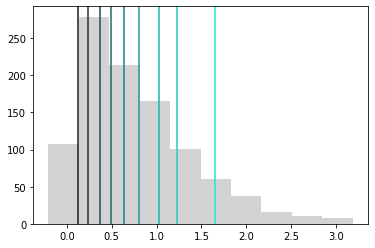

In [ ]:
fig, ax = plt.subplots()
[plt.axvline(x = d_i, color=(0.1, index[i]*0.01, index[i]*0.01)) for i, d_i in enumerate(d)]
plt.hist(x, color='lightgray')

# 3.5 Box-and-Whisker Plots


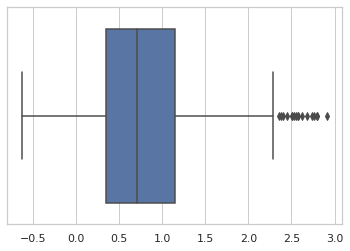

In [ ]:
a = st.skewnorm.rvs(3, size=1000)

sb.set(style='whitegrid')
sb.boxplot(x=a)

## IQR (Inter-Quartile Range) - NumPy

In [ ]:
q_a = np.percentile(x, [25, 50, 75])
q_a

array([0.30656123, 0.63984012, 1.11608081])

## IQR (Inter-Quartile Range) - Manual

In [ ]:
median = q_a[2] - np.abs(q_a[0])
median

0.8095195747010931

In [ ]:
# upper limit
q_a[0] - 1.5 * median

-0.907718129309783

In [ ]:
# lower limit
q_a[2] + 1.5 * median

2.3303601694945897

In [ ]:
np.round([np.max(a), np.min(a)], 2)

array([ 2.91, -0.63])

In [ ]:
iris = sb.load_dataset('iris')
iris[100:110]

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
106,4.9,2.5,4.5,1.7,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica


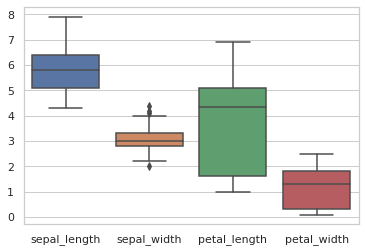

In [ ]:
_ = sb.boxplot(data=iris)

Boxplot tells a lot about the distribution of a dataset. 
- ```sepal_length``` tends to be the longest.
- ```sepal_width``` is close to (most concentrated about) the median. 
- ```petal_length``` is the most spread out from the median.
- ```petla_width``` is the shortest compared to other categories of the flower properties.

In [ ]:
tips = sb.load_dataset('tips')
tips[100:105]

,total_bill,tip,sex,smoker,day,time,size
100,11.35,2.50,Female,Yes,Fri,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2
102,44.30,2.50,Female,Yes,Sat,Dinner,3
103,22.42,3.48,Female,Yes,Sat,Dinner,2
104,20.92,4.08,Female,No,Sat,Dinner,2


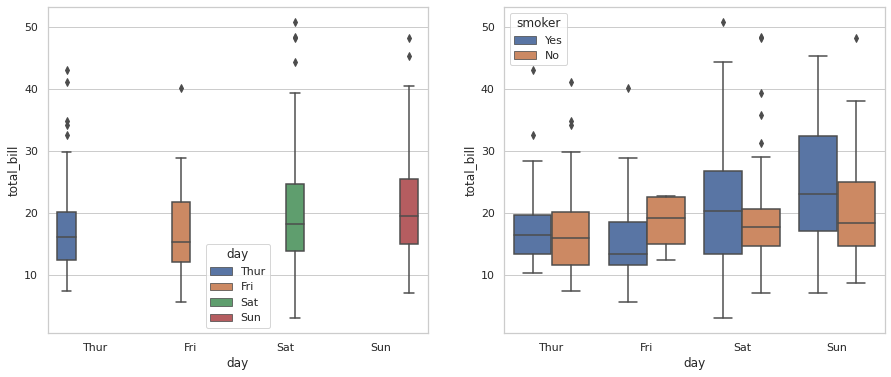

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sb.boxplot(x='day', y='total_bill', hue='day', data=tips, ax=ax[0])
sb.boxplot(x='day', y='total_bill', hue='smoker', data=tips, ax=ax[1])
plt.show()

- Friday saw the lowest maximum tip compared to the other days. 
- The greatest amount of tip given on Friday was from a smoker.
- Saturday and sundays tip tend to range highest. 
- Looks like smokers are more generous tippers than non-smokers(considering the both the IQR and Q3 ranges). 

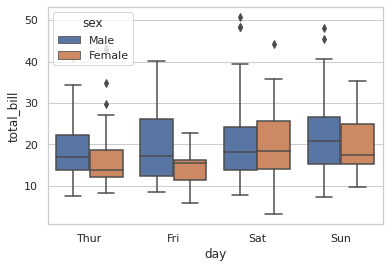

In [ ]:
sb.boxplot(x='day', y='total_bill', hue='sex', data=tips)

- Males are more generous tippers than females.
- Men tend to tip more on weeknds starting from Friday.

# 3.6 Variance, a Measure of Dispersion

Variance (denoted with $\sigma^2$) can be written using expected-value notation, but it's easier to understand without it: 

$$\sigma ^2 = f\frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n}$$

## Manual computation

In [ ]:
xbar = np.mean(x)
xbar

0.7843720194620463

In [ ]:
squared_differences = [(x_i - xbar)**2 for x_i in x]
squared_differences[:10]

[0.02440786825695681,
 0.3010009871574879,
 0.0008905070435172892,
 0.12253487036786774,
 1.3138507927739849,
 0.18697071056554035,
 0.07507369995572812,
 0.24037106839293748,
 2.7240848615188,
 0.13921011842318468]

In [ ]:
sigma_squared = sum(squared_differences) / len(x)
sigma_squared

0.38466345572831334

## NumPy variance

In [ ]:
np.var(x)

0.3846634557283131

# 3.7 Standard Deviation
$$\sigma = \sqrt{\sigma^2} = \sqrt{f\frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n}}$$



In [37]:
sigma = sigma_squared**(1/2)
sigma

0.6202124279054019

In [38]:
np.std(x)

0.6202124279054018

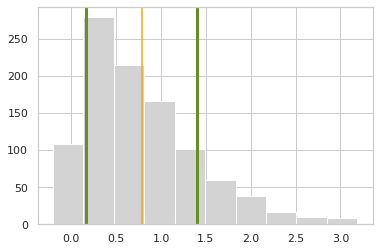

In [40]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')                       # mean of the distribution
plt.axvline(x = xbar+sigma, color='olivedrab',linewidth=3)  # 1 std to the right
plt.axvline(x = xbar-sigma, color='olivedrab',linewidth=3)  # 1 std to the left
_ = plt.hist(x, color = 'lightgray')

# 3.8 Standard Error
A further derivation of standard deviation is **standard error**, which is denoted with \sigma_{\bar x}:

$$\sigma_{\bar x} = \frac{\sigma}{\sqrt n}$$

Standard error tells us whether the distribution of two sets of data significantly vary from each other.
- it gives us the clue to decide whether the two datasets are two differnt phenomena. 
- "The standard error (SE) of a statistic (usually an estimate of a parameter) is the standard deviation of its sampling distribution or an estimate of that standard deviation. If the statistic is the sample mean, it is called the standard error of the mean (SEM)([Wikipedia](https://en.wikipedia.org/wiki/Standard_error))."

In [41]:
sigma / (len(x))**(1/2)

0.01961283905324044

In [42]:
st.sem(x) # defaults to 1 degree of freedom (n-1), which can be ignored with the larger data sets of ML

0.01962265283371608

In [43]:
st.sem(x, ddof=0) # 0 degrees of freedom (n)

0.019612839053240436

# 3.9 Covariance, a Measure of Relatedness

If we have two vectors of the same length, $x$ and $y$, where each element of $x$ is paired with the corresponding element of $y$, covariance provides a measure of how related the variables are to each other: 

$$cov(x, y) = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{n}$$

- sum of $variance(x) \times variance (y)$ divided by $length(n)$

Taking the ```iris``` dataset as an example, a specific ```sepal_length``` is associated with a specific ```petal_length```. Therefore, it makes sense to investigate the correlation between these two features. Look at the ```iris``` dataset below.

In [44]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Manual covariance

In [45]:
x = iris.sepal_length
y = iris.petal_length

In [92]:
target = []
for i in range(len(iris.species)):
    if (iris.species[i] == "setosa"):
        target.append(1)
    elif (iris.species[i] == "versicolor"):
        target.append(2)
    else:
        target.append(3)

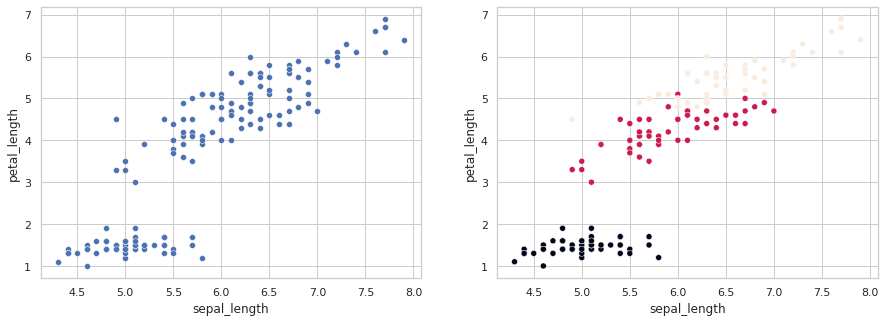

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sb.scatterplot(x=x, y=y, ax=ax[0])
sb.scatterplot(x=x, y=y, c=target, ax=ax[1])

In [98]:
n = len(iris.sepal_width)

In [99]:
xbar = sum(x)/n
ybar = sum(y)/n

xbar, ybar

(5.843333333333335, 3.7580000000000027)

In [110]:
x_diff = [(x_i-xbar) for x_i in x]
y_diff = [(y_i-xbar) for y_i in y]

xy_product = []
for i in range(n):
    xy_product.append(x_diff[i]*y_diff[i])
cov_iris = sum(xy_product)/n
cov_iris

# one-liner: product.append((x[i]-xbar)*(y[i]-ybar))

1.2658200000000028

## NumPy Covariance

The NumPy cov() method returns a covariance matrix, which is a $2 \times 2$ matrix because $x$ and $y$ together describe a two-dimensional space:


In [111]:
np.cov(x, y, ddof=0)    # again, defaults to ddof=1

# [variance x, covariance] # positive covariance = positive relationship
# [covariance, variance y] # nevative covariance = nevative relationship

array([[0.68112222, 1.26582   ],
       [1.26582   , 3.09550267]])

In [115]:
np.var(x), np.var(y), (np.var(x)*np.var(y)/2) 

(0.6811222222222222, 3.0955026666666674, 1.0542078276074076)

If $x$ and $y$ are inversely related, their covariance is negative. The less related they are, the closer their covariance is to zero:

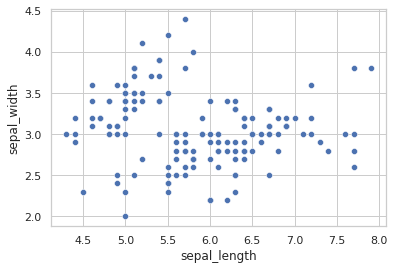

In [117]:
_ = sb.scatterplot(x=iris.sepal_length, y=iris.sepal_width)

In [119]:
cov_sepal = np.cov(iris.sepal_length, iris.sepal_width, ddof=0)
cov_sepal

array([[ 0.68112222, -0.04215111],
       [-0.04215111,  0.18871289]])

# 3.10. Correlation
A derivation of covariance

- A drawback of covariance is that it confounds the relative scale of two variables with a measure of the variables' relatedness. Correlation builds on covariance and overcomes this drawback via **rescaling**, thereby measuring relatedness exclusively. Correlation is much more common because of this difference.

The correlation coefficient (developed by Karl Pearson in the 20th c. though known in the 19th c.) is often denoted with $r$ or $\rho$ and is defined by: 

$$\rho _{x, y}=\frac{cov(x,y)}{\sigma_x\sigma_y}$$

N.B.: Covariance and correlation only account for linear relationships. Two variables could be non-linearly related to each other and these metrics could come out as zero.


## Manual correlation

In [124]:
cov = cov_sepal[0][1]
sigma_sq_x = cov_sepal[0][0]
sigma_sq_y = cov_sepal[1][1]

cov, sigma_sq_x, sigma_sq_y

(-0.042151111111111104, 0.6811222222222221, 0.18871288888888882)

In [125]:
sigma_x = sigma_sq_x**(1/2)
sigma_y = sigma_sq_y**(1/2)

sigma_x, sigma_y

(0.8253012917851408, 0.4344109677354945)

We are now controlling for the differing variance. So these differing variances no longer have an impact on our measure of the relatedness of X and Y. 

In [127]:
corr = cov / (sigma_x*sigma_y)
corr

-0.11756978413300208

## NumPy correlation

In [133]:
corr_pearson = st.pearsonr(iris.sepal_length, iris.sepal_width)

print(corr)         # no significant correlation
print(corr_pearson)
print(np.round(corr,3) == np.round(corr_pearson[0], 3))

-0.11756978413300208
(-0.11756978413300206, 0.15189826071144766)
True


In [135]:
corr_petal = st.pearsonr(iris.sepal_length, iris.petal_length)
corr_petal[0]   # strong correlation 

0.8717537758865831

# Frequent Functions
- ```st.mode(heads_count)```
  - ```import scipy.stats as st```
- ```st.skewnorm.rvs(skewness=0, size=1000)```
  - ```0 means no skewness+```
- ```np.quantile(x, 0.5)```: 2nd arg ranges 0 ~ 1.
- ```np.percentile(x, [95, 99])```: 2nd arg ranges 0 ~ 100.
- ```sb.boxplot(x=, y=, hue=category, data=dataset, ax=ax[0])```
  - ```ax```: for allocating a plot to a specific subplot.
- ```scatter plot```
    - ```sb.scatterplot(x=x, y=y)```
    - ```plt.scatter(x, y, c=c)```
- ```st.pearsonr(x, y)```